# Regresyon Ağaçları (CART)

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from skompiler import skompile
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [139]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [140]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [141]:
cart_model = DecisionTreeRegressor(min_samples_split = 10)

In [142]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=10)

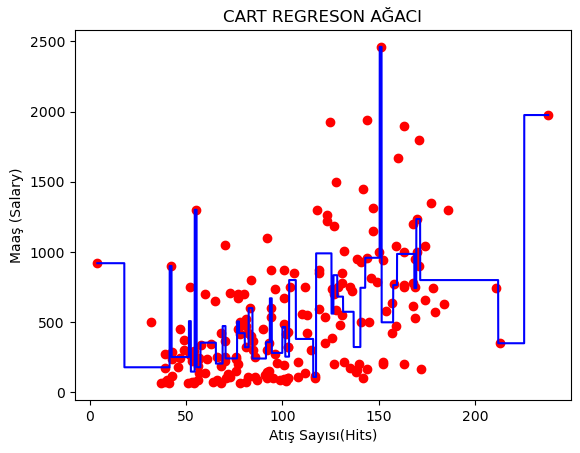

In [44]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [48]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else (178.92857142857142 if x[0] <= 41.5 else 900.0 if
    x[0] <= 42.5 else ((251.85188888888888 if x[0] <= 51.5 else 507.5) if x
    [0] <= 52.5 else 148.1) if x[0] <= 54.5 else 1300.0 if x[0] <= 55.5 else
    179.5 if x[0] <= 57.5 else ((354.0952857142857 if x[0] <= 65.5 else 
    205.2) if x[0] <= 69.0 else 472.5) if x[0] <= 70.5 else 
    241.9047142857143) if x[0] <= 76.5 else (((505.0 if x[0] <= 77.5 else (
    ((421.66675 if x[0] <= 80.5 else 321.6666666666667) if x[0] <= 82.5 else
    600.0) if x[0] <= 84.5 else 241.28571428571428 if x[0] <= 91.5 else 
    357.5) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else 281.1666 if x[0] <=
    100.0 else 466.0) if x[0] <= 101.5 else 254.52385714285714) if x[0] <= 
    103.5 else 800.0 if x[0] <= 107.0 else 380.625) if x[0] <= 116.0 else 
    110.0) if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 125.5 else 
    (561.25 if x[0] <= 126.5 else 834.6666000000001 if x[0] <= 128.5 else 
    682.0) if x[0] <= 131.5

# Tahmin

In [51]:
x = [91]

In [52]:
((920.0 if x[0] <= 18.0 else (178.92857142857142 if x[0] <= 41.5 else 900.0 if
    x[0] <= 42.5 else ((251.85188888888888 if x[0] <= 51.5 else 507.5) if x
    [0] <= 52.5 else 148.1) if x[0] <= 54.5 else 1300.0 if x[0] <= 55.5 else
    179.5 if x[0] <= 57.5 else ((354.0952857142857 if x[0] <= 65.5 else 
    205.2) if x[0] <= 69.0 else 472.5) if x[0] <= 70.5 else 
    241.9047142857143) if x[0] <= 76.5 else (((505.0 if x[0] <= 77.5 else (
    ((421.66675 if x[0] <= 80.5 else 321.6666666666667) if x[0] <= 82.5 else
    600.0) if x[0] <= 84.5 else 241.28571428571428 if x[0] <= 91.5 else 
    357.5) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else 281.1666 if x[0] <=
    100.0 else 466.0) if x[0] <= 101.5 else 254.52385714285714) if x[0] <= 
    103.5 else 800.0 if x[0] <= 107.0 else 380.625) if x[0] <= 116.0 else 
    110.0) if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 125.5 else 
    (561.25 if x[0] <= 126.5 else 834.6666000000001 if x[0] <= 128.5 else 
    682.0) if x[0] <= 131.5 else (574.0666 if x[0] <= 137.0 else 323.0) if 
    x[0] <= 140.5 else 745.0) if x[0] <= 143.0 else (958.6111111111111 if x
    [0] <= 150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[
    0] <= 157.5 else ((((764.4443333333334 if x[0] <= 159.5 else 
    986.0185555555557) if x[0] <= 168.5 else 743.3333333333334) if x[0] <= 
    169.5 else 1234.375) if x[0] <= 171.5 else 799.8518888888889) if x[0] <=
    212.0 else 350.0) if x[0] <= 225.5 else 1975.0)


241.28571428571428

In [53]:
cart_model.predict(X_test)[0:5]

array([574.0666    , 958.61111111, 574.0666    , 281.1666    ,
       178.92857143])

In [54]:
cart_model.predict([[91]])

array([241.28571429])

In [56]:
y_pred = cart_model.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

457.9426150927022

# Model Tuning

In [124]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

519.4652721975481

In [126]:
cart_params = {"min_samples_split" : range(2, 100),
         "max_leaf_nodes" : range(2,10)}

In [127]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [128]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [129]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [134]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [135]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [136]:
y_pred = cart_tuned.predict(X_test)

In [137]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865